In [12]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [4]:
dataset = pd.read_csv("bda_dataset8_2.csv", encoding="latin")
dataset

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


Конвертуємо дані зі стовпця текст у формат string, обчислюємо довжину кожного коментаря і будуємо гістограму розподілу довжини відгуків.

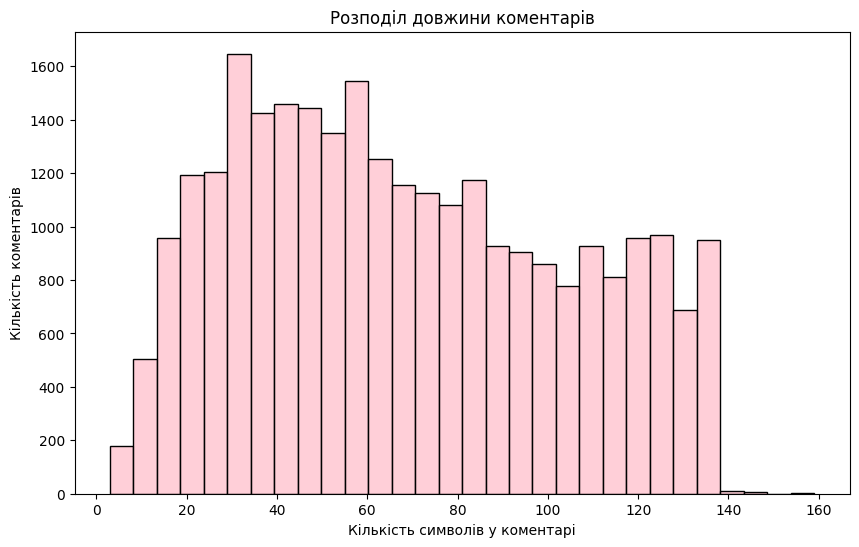

In [24]:
dataset["text"] = dataset["text"].apply(lambda x: str(x))

dataset["comment_length"] = dataset["text"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(dataset["comment_length"], bins=30, color='pink', edgecolor='black')
plt.title("Розподіл довжини коментарів")
plt.xlabel("Кількість символів у коментарі")
plt.ylabel("Кількість коментарів")
plt.show()




За допомогою бібліотеки TextBlob визначаємо полярність коментарів і присвоюємо їм категорії тональності – позитивні, негативні або нейтральні, для цього створюємо окремий стовпчик, не видаляючи при цьому наявний у датасеті стовпчик sentiment

In [6]:
def categorize_polarity(polarity):
    if polarity < 0:
        return "negative"
    
    if polarity > 0:
        return "positive"
    
    return "neutral"

In [7]:
dataset["predicted sentiment"]  = dataset["text"].apply(lambda x: categorize_polarity(TextBlob(x).sentiment.polarity))
dataset

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),comment_length,predicted sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36,neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46,negative
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25,neutral
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31,neutral
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137,77,neutral
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81,122,positive
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331,111,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167,27,positive


Будуємо стовпчикову діаграму розподілу тональностей відгуків, визначених за допомогою вищевказаної бібліотеки

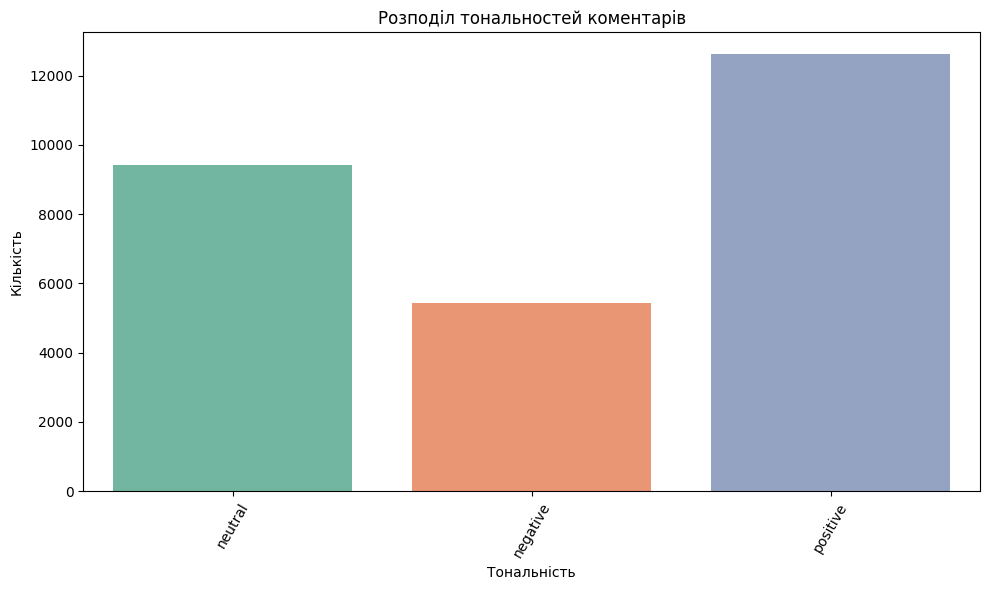

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=dataset, x="predicted sentiment",hue="predicted sentiment", legend=False, palette="Set2")

plt.title('Розподіл тональностей коментарів')
plt.xlabel('Тональність')
plt.ylabel('Кількість')
plt.xticks(rotation=60)
plt.tight_layout() 

plt.show()

Будуємо стовпчикову діаграму, яка показуватиме розподіл тональностей відгуків, визначених за допомогою Textblob, залежно від тональностей, вказаних у вхідному датасеті

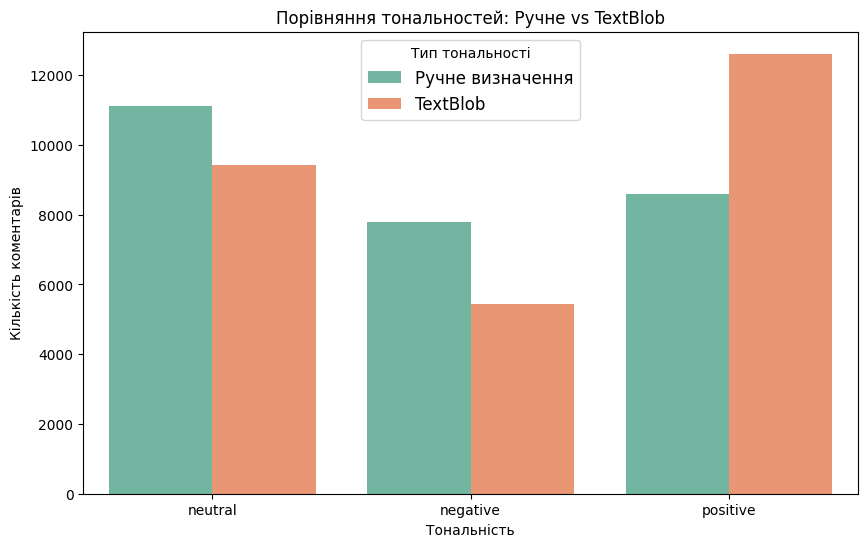

In [9]:
melted_df = dataset.melt(id_vars=['textID'], value_vars=['sentiment', 'predicted sentiment'],
                         var_name='Sentiment_Type', value_name='Sentiment')

plt.figure(figsize=(10,6))
sns.countplot(x="Sentiment", hue="Sentiment_Type", data=melted_df, palette="Set2")

plt.title("Порівняння тональностей: Ручне vs TextBlob")
plt.xlabel("Тональність")
plt.ylabel("Кількість коментарів")
plt.legend(title="Тип тональності", labels=["Ручне визначення", "TextBlob"], loc='upper center', fontsize=12)
plt.show()

За допомогою бібліотеки Wordcloud візуалізуємо слова, які найчастіше зустрічаються в позитивних, негативних і нейтральних коментарях, тональність яких було визначено за допомогою TextBlob

In [27]:
grouped_by_sentement = dataset.groupby("predicted sentiment")["text"].apply(lambda x: " ".join(x)).reset_index()
grouped_by_sentement

,predicted sentiment,text
0,negative,Sooo SAD I will miss you here in San Diego!!!...
1,neutral,"I`d have responded, if I were going my boss i..."
2,positive,http://www.dothebouncy.com/smf - some shameles...


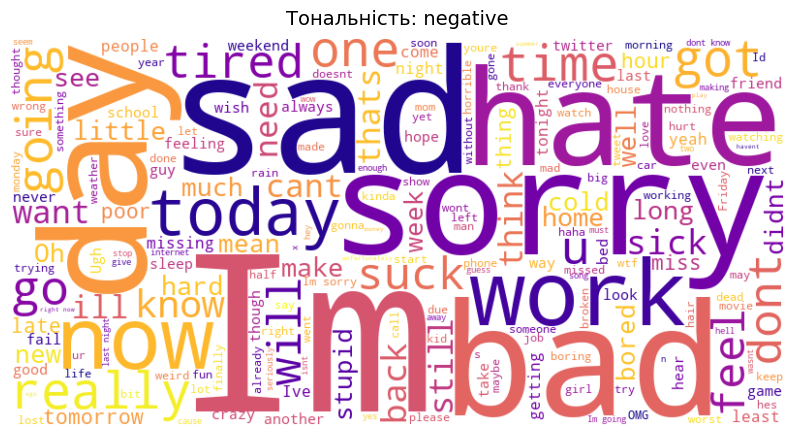

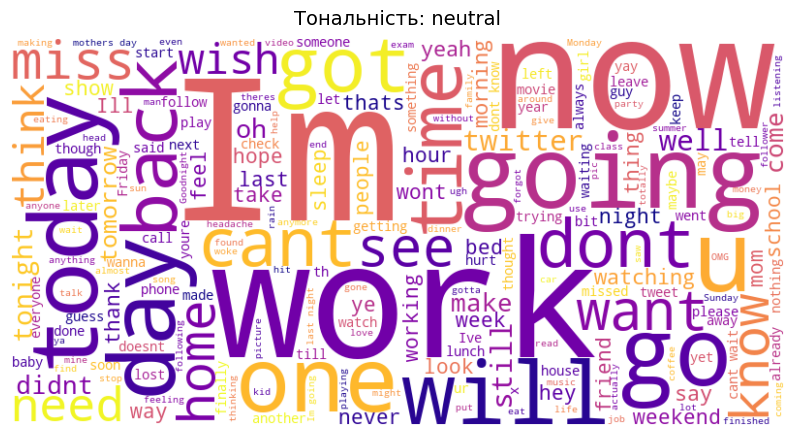

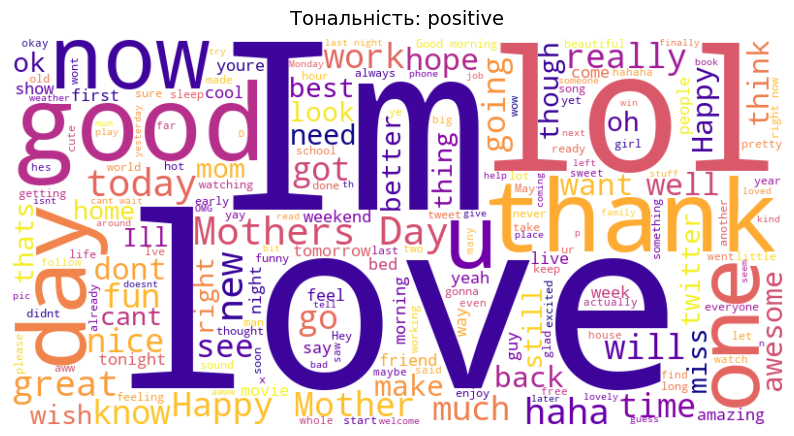

In [34]:
for i in range(0, 3):
    wordcloud = WordCloud(width=800, height=400, background_color="white", random_state=42, colormap='plasma').generate(re.sub(r'[^A-Za-z\s]', '', grouped_by_sentement.loc[i, "text"]))
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    sentiment = grouped_by_sentement.loc[i, "predicted sentiment"] 
    plt.text(0.5, 1.05, f"Тональність: {sentiment}", ha='center', va='center', fontsize=14, color='black', transform=plt.gca().transAxes)
    plt.show()    